# Empfehlungen für Regressionen/Regressionsanalyse

> ## Inhalte

> 1) Theoretischer Hintergrund

> 2) Anwendung der Methode der kleinsten Quadrate an Beispieldatensatz (inkl. Evaluation)

> 3) Multidimensionale Regression

> 4) Cross-validation

> 5) Penalized regression (Theorie und Implementierung)

### 1 Theoretischer Hintergrund

Lineare Regression zählt zum Gebiet des überwachten Lernens, da wir sowohl Trainings- als auch Testdaten verwenden. Eine gute Gerade/Kurve wird benötigt, um aus den Trainingsdaten gute Abschätzungen für zukünftige Punkte bzw. Entwicklungen (z. B. Umsatzentwicklung) treffen zu können. Wir unterscheiden hierbei zwischen unabhängiger Variable und abhängiger Variable. Soll der Einfluss der Variable x auf y betrachtet werden, ist die unabhängige Variable x und die abhängige Variable y, da y von der Variable x *abhängig* ist.

<a href="https://de.khanacademy.org/math/pre-algebra/pre-algebra-equations-expressions/pre-algebra-dependent-independent/a/dependent-and-independent-variables-review">Quelle</a>

Beim *machine learning* geht es darum, die Fehlerquote eines Modells zu verringern beziehungsweise möglichst genau Vorhersagen treffen zu können. *machine learning* bedient sich vieler unterschiedlicher Bereiche, unter anderem dem Bereich der Statistik. Lineare Regression wurde in diesem Bereich entwickelt und wird nun verwendet um die Beziehungen zwischen Einflussgrößen und Ergebnisdaten zu verstehen. Lineare Regression wird sowohl als statistischer Algorithmus als auch als *machine learning* Algorithmus gesehen.

<img src="img/MachineLearningAlgorithms.png" width="1000">
<a href="https://machinelearningmastery.com/linear-regression-for-machine-learning/">Quelle</a>



Wir beschränken uns bei unseren Betrachtungen auf *lineare* Regressionen, außerdem sind viele Beispiele an das Kapitel *Recommendations for Regressions* aus dem E-Book *Building Machine Learning Algorithms with Python* angelehnt.

#### 1.1 Ausgleichungsrechnung

Hierbei sollen Punkte bzw. Messdaten, die wir nicht kennen, möglichst genau bestimmt/geschätzt werden, indem eine Gerade/Kurve durch die Punkte gelegt wird. Welche Daten von den einzelnen Punkten genau repräsentiert werden, ist irrelevant (Wachstumsrate, Umsatz, Bevölkerungsanzahl).

#### 1.2 Methode der kleinsten Quadrate (ordinary least squares)

Carl Friedrich Gauß <a href="https://www.spektrum.de/lexikon/physik/methode-der-kleinsten-quadrate/9682">behauptet</a> in seiner Veröffentlichung von 1809 (*Theoria Motus Corporum Coelestium*), die Methode der kleinsten Quadrate seit 1795 zu benutzen. Erst durch den Aufsatz von A. Legendre 1805 ist ihm aber wohl aufgefallen, welche Bedeutung die Anwendung dieser Methode hat.
Um zu einer Menge an Punkten eine möglichst gut passende Kurve zu finden, wird häufig die Methode der kleinsten Quadrate verwendet, die zum Bereich der deskriptiven Statistik gehört und das mathematische Standardverfahren der Ausgleichungsrechnung darstellt. Hierbei sollen die Parameter der Geraden/Kurve, die durch eine Punktwolke gelegt wird, so bestimmt werden, dass die Distanz (als Quadratsumme) der einzelnen Punkte der Funktion von den Beobachtungen möglichst minimiert wird. Residuen bezeichnen die vertikale Distanz zwischen Datenpunkt und Funktion.
Formalisiert sieht die Methode so aus:

$$
\vec{b} = arg \ min _{\vec{b}} (y - X\vec{b})²
$$

<img src="img/ols_example.png" width="600">

<a href="https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/MDKQ1.svg/250px-MDKQ1.svg.png">Quelle</a>

Die einzelnen Rechenschritte sehen folgendermaßen aus.

|  x |y   |
|---|---|
|  $x_1$ |  $y_1$|  
|  $x_2$ | $y_1$  |  
|  $x_3$ | $y_1$  | 
|  $x_4$ | $y_1$  |  
  |  ... | ...  |  
  |  $x_n$ | $y_n$  | 

#### Berechnung einer Trendgeraden

Bei der Berechnung der Trendgeraden sind einige Vorbereitungschritte nötig.

|  x |y   |  x-$\bar x$ |y-$\bar y$ |  (x-$\bar x$)² | (y-$\bar y$)²
|---|---|
|  ... | ...  |  ... |... | ... |...
|$\bar x$  | $\bar y$  |$\sum_{}$| $\sum_{}$ |$\sum_{}$  | $\sum_{}$ 

Allgemeine Formel:

$$
y = m * x + b
$$

Berechnung von $m$:

$$
m = \dfrac{\sum_{} (x-\bar{x})(y-\bar{y})}{\sum_{} (x-\bar{x})²} 
$$

Berechnung von $b$:

$$
b = \bar{y}-m*\bar{x} 
$$

#### 1.3 Beispiel WF-Studenten pro Semester


|  Semester | Anzahl Studenten   |
|---|---|
|  1 |  40|  
|  2 | 35  |  
|  3 | 30 | 
|  4 | 25  |  
  |  5 | 20  |  
  |  6 | 15  | 
    |  7 | 12  | 

Im Folgenden Beispiel wird eine Regressionsgerade durch die Anzahl der Studenten im Studiengang Wirtschaftsinformatik pro Semester gelegt. Dabei gilt zu beachten, dass die Funktion np.linalg.lstsq() die Steigung immer betragsweise zurückgibt, auch wenn die Steigung ganz offensichtlich negativ sein muss. In diesem Beispiel helfen wir händisch etwas nach. Außerdem berechnen wir den y-Achsenabschnittspunkt händisch. Dies ließes sich auch von der Funktion berechnen lassen.

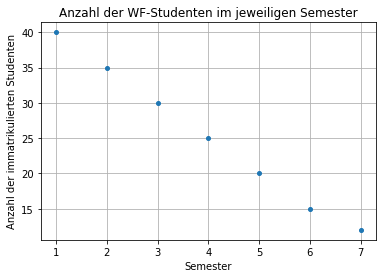

In [15]:
from matplotlib import pyplot as plt

semester = [1,2,3,4,5,6,7]
students = [40, 35, 30, 25, 20, 15, 12]

plt.plot(semester, students, 'o', markersize = 4)

plt.title('Anzahl der WF-Studenten im jeweiligen Semester')
plt.xlabel('Semester')
plt.ylabel('Anzahl der immatrikulierten Studenten')
plt.grid(True)
plt.show()

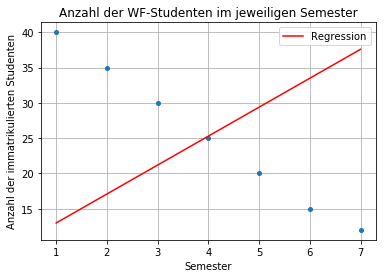

In [16]:
import numpy as np

x_bar = sum(semester)/len(semester)
y_bar = sum(students)/len(students)

semester = np.array([[v] for v in semester])

slope = np.linalg.lstsq(semester, students, rcond=None) # if x is two-dimensional, the least-squares solution is calculated ...

b = y_bar - slope[0][0] * x_bar # calculation of axis intercept of y
plt.plot(semester, students, 'o', markersize = 4)
plt.plot(semester, slope[0][0] * semester+b, 'r', label='Regression')

plt.title('Anzahl der WF-Studenten im jeweiligen Semester')
plt.xlabel('Semester')
plt.ylabel('Anzahl der immatrikulierten Studenten')
plt.grid(True)
plt.legend()
plt.show()

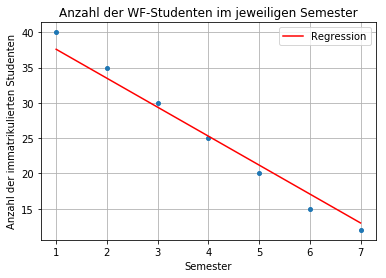

In [17]:
b = y_bar - (-slope[0][0]) * x_bar # calculation of axis intercept of y

plt.plot(semester, students, 'o', markersize = 4)
plt.plot(semester, (-slope[0][0]) * semester+b, 'r', label='Regression')

plt.title('Anzahl der WF-Studenten im jeweiligen Semester')
plt.xlabel('Semester')
plt.ylabel('Anzahl der immatrikulierten Studenten')
plt.grid(True)
plt.legend()
plt.show()

Die Anzahl der Studenten nimmt kontinuierlich von Semester zu Semester ab. Unsere Regressionsgerade versucht zu allen Punkten einen möglichst geringen Abstand zu halten. Problematisch wird es, wenn wir statt des jeweiligen Semesters das Jahr anzeigen lassen möchten. Nun führen die hohen X-Werte zu einer schlechten Regressionsgerade.

|  Semester | Anzahl Studenten   |
|---|---|
|  2001 |  40|  
|  2002 | 35 |  
|  2003 | 30 | 
|  2004 | 25 |  
|  2005 | 20 |  
|  2006 | 15 | 
|  2007 | 12 | 

Laut Formel müssten die Abweichungen dieselben sein, die numpy-Funktion *np.linalg.lstsq* gibt uns bei den verwendeten hohen X-Werten jedoch eine eindeutig falsche Steigung zurück. Leider ist auch aus der <a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html">offziellen Dokumentation</a> nicht ersichtlich, woran dies liegt. 

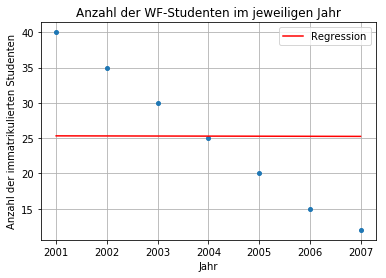

In [5]:
semester = [2001,2002,2003,2004,2005,2006,2007]

x_bar = sum(semester)/len(semester)

semester = np.array([[v] for v in semester])
slope = np.linalg.lstsq(semester, students, rcond=None) # if x is two-dimensional, the least-squares solution is calculated ...

b = y_bar - (-slope[0][0]) * x_bar # calculation of axis intercept of y

plt.plot(semester, students, 'o', markersize = 4)
plt.plot(semester, (-slope[0][0]) * semester+b, 'r', label='Regression')
plt.title('Anzahl der WF-Studenten im jeweiligen Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der immatrikulierten Studenten')
plt.grid(True)
plt.legend()
plt.show()

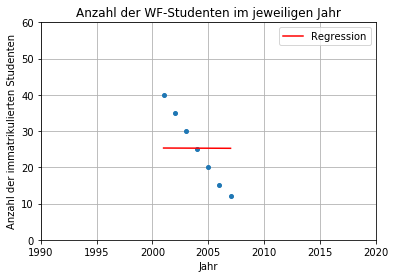

In [6]:
semester = [2001,2002,2003,2004,2005,2006,2007]

x_bar = sum(semester)/len(semester)

semester = np.array([[v] for v in semester])
slope = np.linalg.lstsq(semester, students, rcond=None) # if x is two-dimensional, the least-squares solution is calculated ...

b = y_bar - (-slope[0][0]) * x_bar # calculation of axis intercept of y

v = [1990, 2020, 0, 60]
plt.axis(v)

plt.plot(semester, students, 'o', markersize = 4)
plt.plot(semester, (-slope[0][0]) * semester+b, 'r', label='Regression')
plt.title('Anzahl der WF-Studenten im jeweiligen Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der immatrikulierten Studenten')
plt.grid(True)
plt.legend()
plt.show()

Man könnte nun sagen, dass jedes Jahr für eine Zahl von 1 bis 7 steht, so dass wieder eine gute, passende Regressionsgerade durch die Punkte gelegt wird.

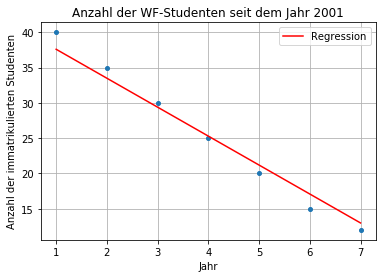

In [7]:
semester = [1,2,3,4,5,6,7]

x_bar = sum(semester)/len(semester)

semester = np.array([[v] for v in semester])
slope = np.linalg.lstsq(semester, students, rcond=None) # if x is two-dimensional, the least-squares solution is calculated ...

b = y_bar - (-slope[0][0]) * x_bar # calculation of axis intercept of y

plt.plot(semester, students, 'o', markersize = 4)
plt.plot(semester, (-slope[0][0]) * semester+b, 'r', label='Regression')
plt.title('Anzahl der WF-Studenten seit dem Jahr 2001')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der immatrikulierten Studenten')
plt.grid(True)
plt.legend()
plt.show()

Nun können wir die Skalierung wieder ändern und sehen, dass wir gute Schätzwerte für das nächste Jahr/Semester erhalten würden.

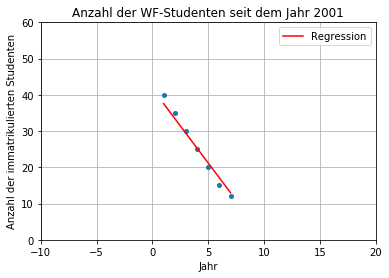

In [8]:
semester = [1,2,3,4,5,6,7]

x_bar = sum(semester)/len(semester)

semester = np.array([[v] for v in semester])
slope = np.linalg.lstsq(semester, students, rcond=None) # if x is two-dimensional, the least-squares solution is calculated ...

b = y_bar - (-slope[0][0]) * x_bar # calculation of axis intercept of y

v = [-10, 20, 0, 60]
plt.axis(v)

plt.plot(semester, students, 'o', markersize = 4)
plt.plot(semester, (-slope[0][0]) * semester+b, 'r', label='Regression')
plt.title('Anzahl der WF-Studenten seit dem Jahr 2001')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der immatrikulierten Studenten')
plt.grid(True)
plt.legend()
plt.show()

#### 1.4 Beispiel Schuhgröße und Jahreseinkommen

Die folgende Tabelle zeigt die Schuhgröße sowie das dazugehörige Jahresgehalt. Es wird deutlich, dass eine positive Korrelation zwischen Schuhgröße und Jahresgehalt vorhanden ist, was sich auf eine geschlechterbedingte Benachteiligung zurückführen ließe.

|  Schuhgröße | Jahresgehalt   |
|---|---|
|  37 |  40|  
|  38 | 45  |  
|  39 | 47 | 
|  40 | 55  |  
|  41 | 60  |  
|  42 | 75  | 
|  43 | 80  | 
|  44 | 82  | 
|  45| 85  | 
|  46 | 85  | 

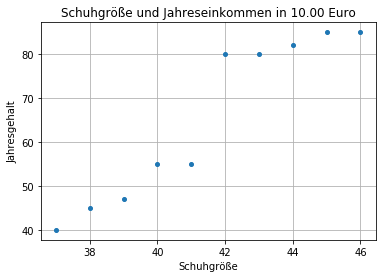

In [9]:
shoe_size = [37,38,39,40,41,42,43,44,45,46]
income = [40, 45, 47, 55, 55, 80, 80, 82, 85, 85]

plt.plot(shoe_size, income, 'o', markersize = 4)

plt.title('Schuhgröße und Jahreseinkommen in 10.00 Euro')
plt.xlabel('Schuhgröße')
plt.ylabel('Jahresgehalt')
plt.grid(True)
plt.show()

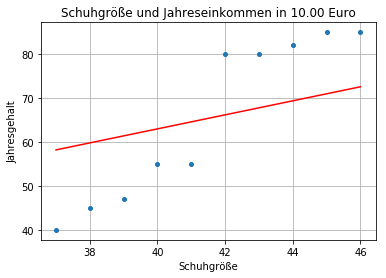

In [10]:
x_bar = sum(shoe_size)/len(shoe_size)
y_bar = sum(income)/len(income)

shoe_size = np.array([[v] for v in shoe_size])

slope = np.linalg.lstsq(shoe_size, income, rcond=None) # if x is two-dimensional, the least-squares solution is calculated ...

b = y_bar - slope[0][0] * x_bar # calculation of axis intercept of y
plt.plot(shoe_size, income, 'o', markersize = 4)
plt.plot(shoe_size, slope[0][0] * shoe_size+b, 'r', label='Regression')

plt.title('Schuhgröße und Jahreseinkommen in 10.00 Euro')
plt.xlabel('Schuhgröße')
plt.ylabel('Jahresgehalt')
plt.grid(True)
plt.show()

Der Plot veranschaulicht die Grenzen der linearen Regression: An dieser Stelle wäre es sinnvoll, eine kurve durch die Punkte zu legen, um eine gute Approximation zu erhalten.

### 2.  Beispiel: Vorhersage der Immobilienpreise in Boston

Das folgende Beispiel ist angelehnt an das Kapitel *Regressions - Recommendations* aus dem E-Book *Building Machine Learning Systems with Python*. Zunächst schauen wir uns den Datensatz etwas genauer an.

In [19]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()

In [20]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [21]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [22]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [25]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


506
506


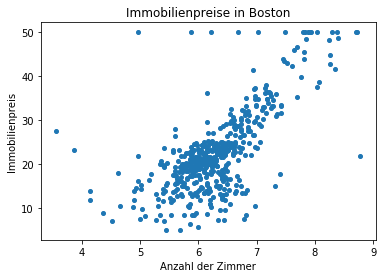

In [36]:
plt.plot(boston.data[:,5], boston.target, 'o', markersize = 4)
plt.xlabel('Anzahl der Zimmer')
plt.ylabel('Immobilienpreis')
plt.title('Immobilienpreise in Boston')

print(len(boston.data[:,5]))
print(len(boston.target))

Erste Regressionsgerade mithilfe der Methode der kleinsten Quadrate.

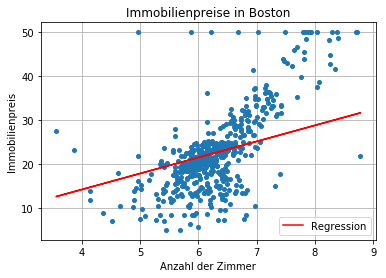

In [35]:
x_old_rm = boston.data[:,5]
y = boston.target
x_bar = sum(x_old_rm)/len(x_old_rm)
y_bar = sum(y)/len(y)

x_old_rm = np.array([[v] for v in x_old_rm])

slope = np.linalg.lstsq(x_old_rm,y, rcond=None) # If x is two-dimensional, the least-squares solution is calculated for each of the K columns of x.

b = y_bar - slope[0][0] * x_bar # Berechnung des y-Achsenabschnittspunkts
plt.plot(x_old_rm[:,0], y, 'o', markersize = 4)
plt.plot(x_old_rm[:,0],slope[0][0] * x_old_rm[:,0]+b, 'r', label='Regression')
plt.xlabel('Anzahl der Zimmer')
plt.ylabel('Immobilienpreis')
plt.title('Immobilienpreise in Boston')
plt.grid(True)
plt.legend()
plt.show()

Die durch die Punkte gelegte Regressionsgerade ist nicht optimal, da sie approximativ nicht viele Punkte repräsentiert.

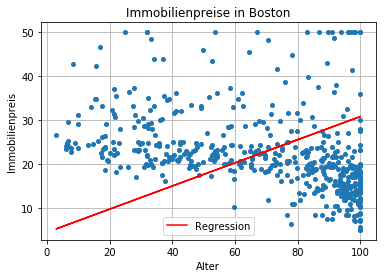

In [34]:
x_old_age = boston.data[:,6]
y = boston.target
x_bar = sum(x_old_age)/len(x_old_age)
y_bar = sum(y)/len(y)

x_old_age = np.array([[v] for v in x_old_age])

slope = np.linalg.lstsq(x_old_age,y, rcond=None) # If x is two-dimensional, the least-squares solution is calculated for each of the K columns of x.

b = y_bar - slope[0][0] * x_bar # Berechnung des y-Achsenabschnittspunkts

plt.plot(x_old_age[:,0], y, 'o', markersize = 4)
plt.plot(x_old_age[:,0],slope[0][0] * x_old_age[:,0]+b, 'r', label='Regression')
plt.xlabel('Alter')
plt.ylabel('Immobilienpreis')
plt.title('Immobilienpreise in Boston')
plt.grid(True)
plt.legend()
plt.show()

Die Regressionsgerade suggeriert ein falsches Bild: Mit zunehmendem Alter des Hausbesitzers steigt der Immobilienwert nicht, ganz im Gegenteil - er sinkt.

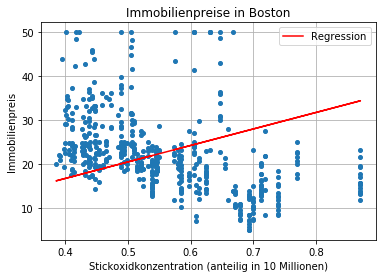

In [21]:
x_old_ox = boston.data[:,4]
y = boston.target
x_bar = sum(x_old_ox)/len(x_old_ox)
y_bar = sum(y)/len(y)

x_old_ox = np.array([[v] for v in x_old_ox])

slope = np.linalg.lstsq(x_old_ox,y, rcond=None) # If x is two-dimensional, the least-squares solution is calculated for each of the K columns of x.

b = y_bar - slope[0][0] * x_bar # Berechnung des y-Achsenabschnittspunkts

plt.plot(x_old_ox[:,0], y, 'o', markersize = 4)
plt.plot(x_old_ox[:,0],slope[0][0] * x_old_ox[:,0]+b, 'r', label='Regression')
plt.xlabel('Stickoxidkonzentration (anteilig in 10 Millionen)')
plt.ylabel('Immobilienpreis')
plt.title('Immobilienpreise in Boston')
plt.grid(True)
plt.legend()
plt.show()

Auch diese Regressionsgerade suggiert ein falsches Bild: Mit zunehmender Stickoxidkonzentration steigt der Immobilienpreis nicht, sondern sinkt.

Eine Möglichkeit, dieses Problem zu lösen, besteht darin, eine konstante Größe hinzuzufügen (*bias term*). Diese Konstante stellt den Preis für ein Apartment ohne Schlafzimmer dar. Formal wird jeder X-Wert um eins erhöht. Dies funktioniert, indem der zweiten Dimension der Matrix von x der Wert 1 hinzugefügt wird. Nur deswegen lässt sich eine Konstante von der Funktion *np.linalg.lstsq()* überhaupt abrufen.

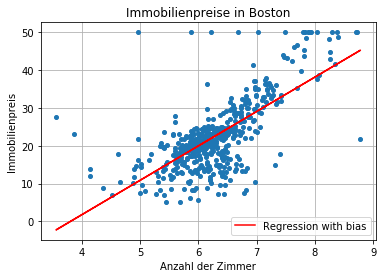

In [22]:
x_new_rm = boston.data[:,5]
x_new_rm = np.array([[v,1] for v in x_new_rm]) # An dieser Stelle wird der zweiten Dimension von x eine 1 hinzugefügt
y = boston.target
(slope, bias),_,_,_ = np.linalg.lstsq(x_new_rm,y, rcond=None)
plt.plot(x_new_rm[:,0], y, 'o', markersize = 4)
plt.plot(x_new_rm[:,0], slope * x_new_rm[:,0]+bias, 'r', label='Regression with bias')
plt.xlabel('Anzahl der Zimmer')
plt.ylabel('Immobilienpreis')
plt.title('Immobilienpreise in Boston')
plt.grid(True)
plt.legend()
plt.show()

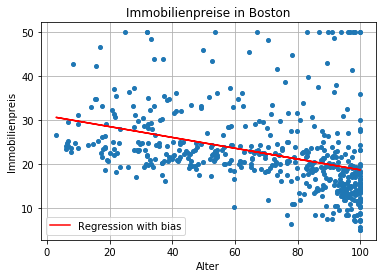

In [23]:
x_new_age = boston.data[:,6]
x_new_age = np.array([[v,1] for v in x_new_age]) # An dieser Stelle wird der zweiten Dimension von x eine 1 hinzugefügt
y = boston.target
(slope, bias),_,_,_ = np.linalg.lstsq(x_new_age,y, rcond=None)
plt.plot(x_new_age[:,0], y, 'o', markersize = 4)
plt.plot(x_new_age[:,0], slope * x_new_age[:,0]+bias, 'r', label='Regression with bias')
plt.xlabel('Alter')
plt.ylabel('Immobilienpreis')
plt.title('Immobilienpreise in Boston')
plt.grid(True)
plt.legend()
plt.show()

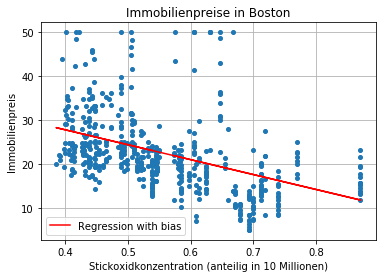

In [24]:
x_new_ox = boston.data[:,4]
x_new_ox = np.array([[v,1] for v in x_new_ox]) # An dieser Stelle wird der zweiten Dimension von x eine 1 hinzugefügt
y = boston.target
(slope, bias),_,_,_ = np.linalg.lstsq(x_new_ox,y, rcond=None)
plt.plot(x_new_ox[:,0], y, 'o', markersize = 4)
plt.plot(x_new_ox[:,0], slope * x_new_ox[:,0]+bias, 'r', label='Regression with bias')
plt.xlabel('Stickoxidkonzentration (anteilig in 10 Millionen)')
plt.ylabel('Immobilienpreis')
plt.title('Immobilienpreise in Boston')
plt.grid(True)
plt.legend()
plt.show()

### 2.1  Evaluation der Ergebnisse mithilfe des RMSE

Nun würden wir gerne in Zahlen ausdrücken, wie gut unsere Regressionsgerade ist. 
Die __Wurzel der mittleren Fehlerquadratsumme__ wird auch als *root mean squared error* (RMSE) bezeichnet. Hiermit lässt sich quantifizieren, wie gut unsere Funktion schätzt. Ferner gibt diese Kennzahl Auskunft darüber, wie weit unsere Funktion von den einzelnen Datenpunkten entfernt ist.
Für jedes Element von x wird der Fehler einzeln berechnet, indem von der Regressionsgeraden immer die Distanz zum eigentlichen Punkt berechnet wird. Diese Distanz wird daraufhin quadriert, alle quadrierten Werte werden summiert. Wir dividieren nun aber noch diese Summe durch die Anzahl der Werte von x und ziehen die Wurzel, um ein verständlicheres Ergebnis zu erhalten. Formal sieht der RMSE folgendermaßen aus.

$$
RMSE = \ \sqrt{\frac{\sum_{i}^n (z_{fi} - z_{oi})²}{n}}
$$

In Python lässt sich der RMSE mithilfe der np.linalg.lstsq()-Funktion in zwei Zeilen berechnen.

In [25]:
def calculate_rmse(x_Value):
    (slope),total_error,_,_ = np.linalg.lstsq(x_Value,y, rcond=None)
    rmse = np.sqrt(total_error[0]/len(x_Value))
    return rmse

print('RMSE (RM without bias): {:.3}'.format(calculate_rmse(x_old_rm)))
print('RMSE (RM with bias): {:.3}\n'.format(calculate_rmse(x_new_rm)))
print('RMSE (AGE without bias): {:.3}'.format(calculate_rmse(x_old_age)))
print('RMSE (AGE with bias): {:.3}\n'.format(calculate_rmse(x_new_age)))
print('RMSE (OX without bias): {:.3}'.format(calculate_rmse(x_old_ox)))
print('RMSE (OX with bias): {:.3}'.format(calculate_rmse(x_new_ox)))

RMSE (RM without bias): 7.64
RMSE (RM with bias): 6.6

RMSE (AGE without bias): 14.5
RMSE (AGE with bias): 8.51

RMSE (OX without bias): 11.8
RMSE (OX with bias): 8.31


Der Abstand der einzelnen Punkte zur Funktion ist bei Verwendung einer Konstanten geringer geworden. Somit passt sich unsere Funktion den Trainingsdaten besser an als zuvor.

### 3. Multidimensionale Regression

Bis jetzt haben wir lediglich eine einzige Variable für unsere Vorhersage betrachtet, beispielsweise die Anzahl der Zimmer. Nun werden wir alle Daten verwenden, die uns zur Verfügung stehen, um eine multidimensionale Regression durchführen zu können. Wir versuchen nun den durchschnittlichen Immobilienpreis basierend auf mehreren Variablen zu berechnen. 

In [26]:
x = boston.data
print(sum(x[0]))
x = np.array([np.concatenate((v, [1])) for v in boston.data])
print(sum(x[0]))

810.89932
811.89932


In [27]:
print('RMSE: {:.3}'.format(calculate_rmse(x)))

RMSE: 4.68


Da das Fehlerquadrat nur noch 4,68 beträgt, haben wir eine Verbesserung erzielt im Vergleich zum vorherigen Ergebnis. Das spricht dafür, dass die zusätlichen Variablen durchaus geholfen haben. Leider lässt sich dies nicht mehr so leicht grafisch darstellen, da wir eine 14-dimensionale Regression haben.

### 4. Cross-validation

Um sicher gehen zu können, dass unsere Berechnungen stimmen, verwenden wir die zwei Bibliotheken LinearRegression und mean_squared_error. Mithilfe der bereitgstellten Funktionen lässt sich der *root mean squared error* vereinfacht berechnen.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression(fit_intercept=True)
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
mse = mean_squared_error(y, lr.predict(x))
print("MSE: {:.3}".format(mse))

rmse = np.sqrt(mse)
print("RMSE: {:.3}".format(rmse))

MSE: 21.9
RMSE: 4.68


Durch die leichtere Berechnung durch das Interface haben wir nun nochmals überprüft, dass unsere Berechnungen gestimmt haben.

#### 4.1 Generelle Evaluation der Regression (*10-fold cross-validation*)

Um generell sagen zu können, wie gut unsere Regression ist, wenden wir den 10fachen *cross-validation loop* an. Hierbei erfahren wir, wie gut unsere Regression im Allgemeinen vorhersagen treffen kann. Der Code stellt eine Adaption der Implementierung des Github-Users <a href="https://github.com/luispedro">Luis Pedro Coelho</a> dar.

In [32]:
from sklearn.metrics import r2_score
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import KFold

data = boston.data
target = boston.target

lr = LinearRegression()

pred = np.zeros_like(target) # pred wird als array mit Nullen initialisiert
kf = KFold(len(target), n_folds=10)
for train, test in kf:
    print(lr.fit(data[train], target[train]))
    lr.fit(data[train], target[train])
    pred[test] = lr.predict(data[test]) # methode der kleinsten quadrate zur vorhersage der preise

print('RMSE on 10-fold CV: {:.3}'.format(np.sqrt(mean_squared_error(target, pred))))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
RMSE on 10-fold CV: 5.88


Der *rmse* ist nun etwas höher als zuvor. Dies ist eine bessere Schätzung, wie gut wir im Allgemeinen Preise vorhersagen können.

Die Methode der kleinsten Quadrate ist eine gute Methode, um schnell ein Modell sowie Vorhersagen zu erhalten. Deswegen sollte es normalerweise das erste Modell sein, das verwendet wird, wenn eine Regression benötigt wird. 

### 5. *Penalized Regression*

Bei einer gewöhnlichen Regression stellt die beste Kurve/Gerade lediglich die beste Regression für die Trainingsdaten dar, kann jedoch zu *overfitting* führen. 

<img src="img/overfitting.png" width="800">

<a href="https://cdn-images-1.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png">Quelle</a>

Beim *penalizing* wird ein bestimmter Betrag den Parametern hinzugefügt, um dies zu verhindern. Hierbei handelt es sich um einen Kompromiss aus bestem Ergebnis für die Trainingsdaten und dem Verhindern des *overfitting*.
Dazu wird eine Konstante hinzugefügt, die dafür sorgt, dass die Abweichung verringert wird, dadurch wird auch die übermäßige Anpassung an die Trainingsdaten verhindert.

#### 5.1 Formalisierung von *L1 penalty (Lasso)* und *L2 penalty (Ridge)*


## <a href="https://medium.com/mlreview/l1-norm-regularization-and-sparsity-explained-for-dummies-5b0e4be3938a">Let's make our model dumber</a>!

Formal sieht die Methode der kleinsten Quadrate so aus:

$$
\vec{b} = arg \ min _{\vec{b}} (y - X\vec{b})²
$$

Ein *L1 penalty* wird hinzugefügt, um die Varianz zu verringern. Lambda steht für eine selbstdefinierte Zahl. 

$$
\vec{b} = arg \ min _{\vec{b}} (y - X\vec{b})² + \lambda\sum_{i} |b_i|
$$

Bzw. OLS mit der Nebenbendingung, dass
$$
|b_i| <= c
$$

Ein *L2 penalty* wird hinzugefügt, indem der Koeffizient b quadriert wird.

$$
\vec{b} = arg \ min _{\vec{b}} (y - X\vec{b})² + \lambda\sum_{i} |b_i|²
$$

Je größer der Koeffizient $\lambda$ vor der Summe ist, desto größer ist die Abweichung des Ergebnisses von der Methode der kleinsten Quadrate. Wird $\lambda$ jedoch auf Null gesetzt, erhält man de facto das Ergebnis der Methode der kleinsten Quadrate.

Eine Kombination der beiden Penalty-Arten wird *Elastic net* genannt. Hierbei werden zwei *penalties* verwendet, einen für den absoluten Wert und einen für den quadrierten Wert.

#### 5.2 Implementierung der Methoden

##### 5.2.1 Plot mit OLS und OLS (bias)

Im folgenden Code wird sowohl eine Gerade mithilfe von OLS durch die uns bekannten Punkte gelegt als auch eine Gerade mithilfe des *L1 penalty (Lasso)*. Das alpha beträgt <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html">per Default 1</a>. Der Code stellt wieder eine Adaption der Implementierung des Github-Users <a href="https://github.com/luispedro">Luis Pedro Coelho</a> dar.

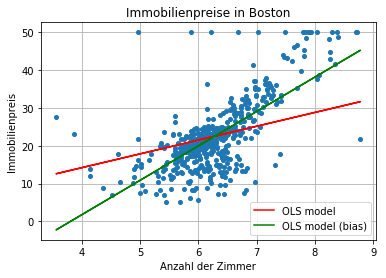

In [33]:
fig, ax = plt.subplots()
ax.plot(x_old_rm[:,0], y, 'o', markersize = 4)

x_bar = sum(x_old_rm)/len(x_old_rm)
y_bar = sum(y)/len(y)

slope = np.linalg.lstsq(x_old_rm,y, rcond=None)

b = y_bar - slope[0][0] * x_bar

ax.plot(x_old_rm[:,0],slope[0][0] * x_old_rm[:,0]+ b, 'r', label='OLS model')

(slope,bias),_,_,_ = np.linalg.lstsq(x_new_rm,y, rcond=None)
ax.plot(x_new_rm[:,0], slope * x_new_rm[:,0]+ bias, 'g', label='OLS model (bias)')

plt.title('Immobilienpreise in Boston')
ax.set_xlabel('Anzahl der Zimmer')
ax.set_ylabel('Immobilienpreis')
plt.grid(True)
plt.legend()

##### 5.2.2 Plot mit OLS, OLS (bias) und Lasso

Bei der Verwendung der Lasso-Funktion von *sklearn* gilt zu beachten, dass das $\lambda$ nun als *alpha* bezeichnet wird.

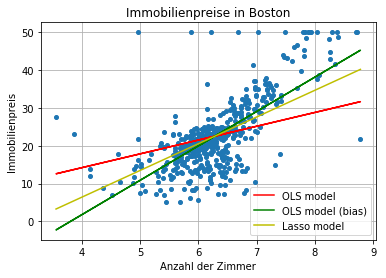

In [34]:
from sklearn.linear_model import Lasso

fig, ax = plt.subplots()
ax.plot(x_old_rm[:,0], y, 'o', markersize = 4)

slope = np.linalg.lstsq(x_old_rm,y, rcond=None)
ax.plot(x_old_rm[:,0],slope[0][0] * x_old_rm[:,0]+ b, 'r', label='OLS model')

(slope,bias),_,_,_ = np.linalg.lstsq(x_new_rm,y, rcond=None)
ax.plot(x_new_rm[:,0], slope * x_new_rm[:,0]+ bias, 'g', label='OLS model (bias)')

x_rm_lasso = boston.data[:,5]
x_rm_lasso = np.transpose(np.atleast_2d(x_rm_lasso))
xmin = x_rm_lasso.min()
xmax = x_rm_lasso.max()
# equivalent to las = Lasso(alpha = 1.0)
las = Lasso()
las.fit(x_rm_lasso, y)
ax.plot([xmin, xmax], las.predict([ [xmin], [xmax] ]), '-', color = 'y', label='Lasso model')
plt.title('Immobilienpreise in Boston')
ax.set_xlabel('Anzahl der Zimmer')
ax.set_ylabel('Immobilienpreis')
plt.grid(True)
plt.legend()

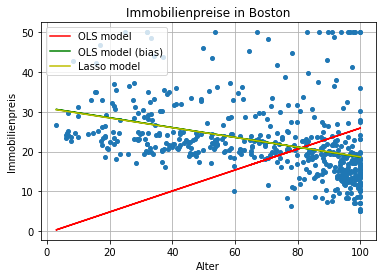

In [35]:
fig, ax = plt.subplots()
ax.plot(x_old_age[:,0], y, 'o', markersize = 4)

slope = np.linalg.lstsq(x_old_age,y, rcond=None)
ax.plot(x_old_age[:,0],slope[0][0] * x_old_age[:,0]+ b, 'r', label='OLS model')

(slope,bias),_,_,_ = np.linalg.lstsq(x_new_age,y, rcond=None)
ax.plot(x_new_age[:,0], slope * x_new_age[:,0]+ bias, 'g', label='OLS model (bias)')

x = boston.data[:,6]
x = np.transpose(np.atleast_2d(x))
xmin = x.min()
xmax = x.max()
# equivalent to las = Lasso(alpha = 1.0)
las = Lasso()
las.fit(x, y)
ax.plot([xmin, xmax], las.predict([ [xmin], [xmax] ]), '-', color = 'y', label='Lasso model')
plt.title('Immobilienpreise in Boston')
ax.set_xlabel('Alter')
ax.set_ylabel('Immobilienpreis')
plt.grid(True)
plt.legend()

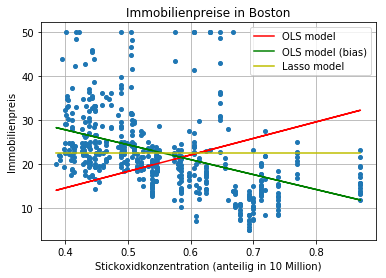

In [36]:
fig, ax = plt.subplots()
ax.plot(x_old_ox[:,0], y, 'o', markersize = 4)

slope = np.linalg.lstsq(x_old_ox,y, rcond=None)
ax.plot(x_old_ox[:,0],slope[0][0] * x_old_ox[:,0]+ b, 'r', label='OLS model')

(slope,bias),_,_,_ = np.linalg.lstsq(x_new_ox,y, rcond=None)
ax.plot(x_new_ox[:,0], slope * x_new_ox[:,0]+ bias, 'g', label='OLS model (bias)')

x = boston.data[:,4]
x = np.transpose(np.atleast_2d(x))
xmin = x.min()
xmax = x.max()
# equivalent to las = Lasso(alpha = 1.0)
las = Lasso()
las.fit(x, y)
ax.plot([xmin, xmax], las.predict([ [xmin], [xmax] ]), '-', color = 'y', label='Lasso model')
plt.title('Immobilienpreise in Boston')
ax.set_xlabel('Stickoxidkonzentration (anteilig in 10 Million)')
ax.set_ylabel('Immobilienpreis')
plt.grid(True)
plt.legend()

Wir sehen, dass die Gerade nach Lasso nicht immer gut zu unseren Trainingsdaten passt, dafür aber eine bessere Abschätzung im Allgemeinen bietet. Hier ist außerdem sehr gut zu erkennen, dass das Lasso-Modell einen Kompromiss zwischen *overfitted* und *underfitted* darstellt.

## Zusammenfassung

Mithilfe der Methode der kleinsten Quadrate (OLS) erhalte ich ein Modell, das

+ einfach ist
+ leicht berechnet werden kann
+ durch eine zusätzliche Konstante optimiert werden kann
+ mit dem RMSE leicht evaluiert werden kann
+ eine gute, schnelle Approximation liefert

allerdings ...

- nicht für alle Datenpunkte geeignet ist (Schuhgröße)
- eventuell zu stark an die Trainingsdaten angepasst ist
- manchmal mit einem Strafterm versehen werden muss, um *overfitting* zu vermeiden